Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('alpha_DESeq2.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_normalized_alpha_counts.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_normalized_alpha_counts.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(18274, 6)
(18274, 3)
(18274, 3)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['padj'])
DESeq_sorted
nan_gene = list(DESeq_sorted[DESeq_sorted['padj'].isnull()].index.values)
DESeq_sorted = DESeq_sorted.drop(nan_gene)
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSMUSG00000000394,338406.987012,2.924096,0.092345,848.511483,1.531699e-186,2.419165e-182
ENSMUSG00000023944,1336.307294,-1.948810,0.085680,574.353175,6.344396e-127,5.010170e-123
ENSMUSG00000040856,21.171989,-11.540402,0.489058,424.702760,2.311257e-94,1.216800e-90
ENSMUSG00000021270,380.144931,-2.526495,0.137592,376.412803,7.515536e-84,2.967509e-80
ENSMUSG00000027419,4779.955765,1.505738,0.076123,356.010722,2.080899e-79,6.573143e-76
...,...,...,...,...,...,...
ENSMUSG00000035851,54.009412,0.003102,0.278133,0.000120,9.912563e-01,1.000000e+00
ENSMUSG00000023030,22.022264,-0.011229,0.617554,0.000350,9.850725e-01,1.000000e+00
ENSMUSG00000097804,0.327192,0.188781,0.715850,-0.148915,1.000000e+00,1.000000e+00
ENSMUSG00000064514,0.446073,-0.074894,1.176225,-0.025380,1.000000e+00,1.000000e+00


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted = GPcounts_NB.drop(nan_gene)
GPcounts_NB_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000001,-1878.577044,-1886.732574,8.155530e+00
ENSMUSG00000000028,-310.960678,-312.599418,1.638740e+00
ENSMUSG00000000031,-128.685861,-128.685860,-9.206144e-07
ENSMUSG00000000037,-164.352203,-164.352219,1.617158e-05
ENSMUSG00000000049,-45.235383,-46.634268,1.398886e+00
...,...,...,...
ENSMUSG00000102059,-673.636922,-675.408098,1.771176e+00
ENSMUSG00000102070,-2509.751783,-2536.542084,2.679030e+01
ENSMUSG00000102097,-328.207947,-328.205369,-2.577879e-03
ENSMUSG00000102101,-571.691738,-571.693340,1.602377e-03


In [5]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted = GPcounts_G.drop(nan_gene)
GPcounts_G_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000001,-647.855596,-668.011537,20.155942
ENSMUSG00000000028,-529.117237,-535.982452,6.865215
ENSMUSG00000000031,-205.861402,-205.861245,-0.000156
ENSMUSG00000000037,-368.781351,-369.672432,0.891081
ENSMUSG00000000049,-129.595978,-128.987922,-0.608056
...,...,...,...
ENSMUSG00000102059,-600.634479,-610.872648,10.238169
ENSMUSG00000102070,-56.501981,-83.004613,26.502632
ENSMUSG00000102097,-482.233558,-482.233877,0.000319
ENSMUSG00000102101,-536.141580,-541.372042,5.230463


In [6]:
DE_alpha = pd.read_csv('Sheet 2_Genes highly expressed in α-lineage.csv',index_col=[0])
DE_alpha.head()

,Symbol,Description,Transcription Factor,log2FoldChange,Adjusted p-value
ID,,,,,
ENSMUSG00000000394,Gcg,glucagon,0,-11.282196,0.0
ENSMUSG00000001504,Irx2,Iroquois related homeobox 2 (Drosophila),1,-9.326386,0.0
ENSMUSG00000004631,Sgce,"sarcoglycan, epsilon",0,-9.841030,0.0
ENSMUSG00000027524,Edn3,endothelin 3,NaN,-9.563078,0.0
ENSMUSG00000027971,Ndst4,N-deacetylase/N-sulfotransferase (heparin gluc...,NaN,-7.362420,0.0


In [7]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-4232.574323,-4697.902286,465.327963
ENSMUSG00000023944,-2420.621014,-2714.511662,293.890648
ENSMUSG00000040856,-759.273066,-1067.074312,307.801246
ENSMUSG00000021270,-2124.555347,-2311.095388,186.540041
ENSMUSG00000027419,-2816.789142,-2996.455181,179.666040
...,...,...,...
ENSMUSG00000035851,-1640.465508,-1640.460346,-0.005162
ENSMUSG00000023030,-1073.761032,-1073.771331,0.010299
ENSMUSG00000097804,-180.014198,-180.011698,-0.002501
ENSMUSG00000064514,-181.709763,-181.706706,-0.003057


In [8]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Dynamic_model_log_likelihood,Constant_model_log_likelihood,log_likelihood_ratio
ENSMUSG00000000394,-134.556252,-367.599805,233.043553
ENSMUSG00000023944,-108.199197,-259.042863,150.843666
ENSMUSG00000040856,-398.984494,-670.409436,271.424942
ENSMUSG00000021270,-279.373423,-381.307048,101.933625
ENSMUSG00000027419,-68.509521,-200.193951,131.684431
...,...,...,...
ENSMUSG00000035851,-550.403900,-551.009962,0.606063
ENSMUSG00000023030,-663.134221,-663.791918,0.657696
ENSMUSG00000097804,-99.236727,-99.236807,0.000081
ENSMUSG00000064514,-206.096264,-206.095827,-0.000437


{0.0: 13240, 1.0: 2554}
{0.0: 12595, 1.0: 3199}
{0.0: 11638, 1.0: 4156}


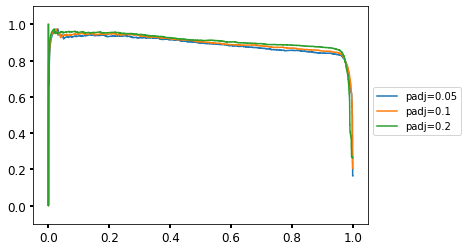

{0.0: 13240, 1.0: 2554}
{0.0: 12595, 1.0: 3199}
{0.0: 11638, 1.0: 4156}


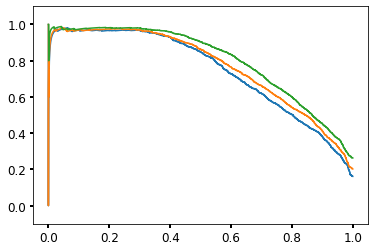

In [9]:
padj = [.05,.1,.2]
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(3):
        true_label = np.zeros(D)
  

        for j in range(D):
            if DESeq_sorted['padj'][j] <= padj[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='padj='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
